# Setup

In [1]:
import json
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data_loc = 'data/All ML Systems - full view.csv'
dtypes = {
    'Training compute (FLOP)': np.float64,
}
pcd_df = pd.read_csv(data_loc, dtype=dtypes)
pcd_df['Decimal year'] = pd.to_datetime(pcd_df['Publication date']).dt.year + (pd.to_datetime(pcd_df['Publication date']).dt.month - 1) / 12 + (pd.to_datetime(pcd_df['Publication date']).dt.day - 1) / 365

In [3]:
pcd_df

,System,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,Training compute upper bound,Training chip-hours,Code accessibility,Dataset accessibility,Accessibility notes,Organization categorization (from Organization),Possibly over 1e23 FLOP,Training cost trends 2,Training cost trends 3,Decimal year
0,Chameleon-34B,"Multimodal,Image generation,Language,Vision","Language modelling/generation,Vision-language ...","Srinivasan Iyer, Bernie Huang, Lili Yu, Arun B...",NaN,NaN,Unreleased,https://arxiv.org/abs/2405.09818v1,NaN,Chameleon: Mixed-Modal Early-Fusion Foundation...,...,NaN,NaN,NaN,NaN,NaN,Industry,NaN,NaN,NaN,2024.374429
1,Chameleon-7B,"Multimodal,Image generation,Vision,Language","Language modelling/generation,Vision-language ...","Srinivasan Iyer, Bernie Huang, Lili Yu, Arun B...",NaN,NaN,Unreleased,https://arxiv.org/abs/2405.09818v1,NaN,Chameleon: Mixed-Modal Early-Fusion Foundation...,...,NaN,NaN,NaN,NaN,NaN,Industry,NaN,NaN,NaN,2024.374429
2,Yi-Large,Language,"Chat,Language modelling/generation",NaN,NaN,NaN,API access,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Industry,checked,NaN,NaN,2024.366210
3,Fugaku-LLM,Language,"Language modelling,Translation,Japanese langua...",NaN,NaN,NaN,Open source,https://www.fujitsu.com/global/about/resources...,NaN,Release of “Fugaku-LLM” – a large language mod...,...,NaN,NaN,NaN,NaN,NaN,"Academia,Industry",NaN,NaN,NaN,2024.357991
4,Gemini 1.5 Flash,"Multimodal,Language,Vision,Audio","Chat,Audio speech recognition,Image captioning...",Gemini Team,NaN,NaN,API access,https://storage.googleapis.com/deepmind-media/...,NaN,Gemini 1.5: Unlocking multimodal understanding...,...,NaN,NaN,NaN,NaN,NaN,Industry,NaN,NaN,NaN,2024.357991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,Self Organizing System,Other,Pattern recognition,W. A. Clark and B. G. Farley,Historical significance,NaN,NaN,https://dl.acm.org/doi/10.1145/1455292.1455309,93.0,Generalization of pattern recognition in a sel...,...,NaN,NaN,NaN,NaN,NaN,Academia,NaN,NaN,NaN,1955.166667
1523,Genetic algorithm,Other,NaN,NA Barricelli,Historical significance,Possibly first computer simulation of a geneti...,NaN,https://link.springer.com/article/10.1007/BF01...,266.0,Numerical testing of evolution theories,...,NaN,NaN,NaN,NaN,NaN,Academia,NaN,NaN,NaN,1954.502740
1524,SNARC,Robotics,Maze solving,Marvin Minsky,Historical significance,NaN,NaN,https://en.wikipedia.org/wiki/Stochastic_neura...,33.0,A Neural-Analogue Calculator Based upon a Prob...,...,NaN,NaN,NaN,NaN,NaN,Academia,NaN,NaN,NaN,1952.019178
1525,Theseus,Robotics,Maze solving,Claude Shannon,Historical significance,NaN,NaN,https://www.technologyreview.com/2018/12/19/13...,0.0,Mighty Mouse,...,NaN,NaN,NaN,NaN,NaN,Industry,NaN,NaN,NaN,1950.502740


In [4]:
pcd_df['Publication date'] = pd.to_datetime(pcd_df['Publication date'])

In [5]:
pcd_df.sort_values('Publication date', inplace=True)

In [6]:
pcd_df.dropna(subset=['Publication date', 'Notability criteria', 'Training compute (FLOP)'], inplace=True)

In [7]:
pcd_df

,System,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,Training compute upper bound,Training chip-hours,Code accessibility,Dataset accessibility,Accessibility notes,Organization categorization (from Organization),Possibly over 1e23 FLOP,Training cost trends 2,Training cost trends 3,Decimal year
1525,Theseus,Robotics,Maze solving,Claude Shannon,Historical significance,NaN,NaN,https://www.technologyreview.com/2018/12/19/13...,0.0,Mighty Mouse,...,NaN,NaN,NaN,NaN,NaN,Industry,NaN,NaN,NaN,1950.502740
1519,Perceptron Mark I,Other,Binary classification,F Rosenblatt,"Historical significance,Highly cited",First modern neural network,NaN,https://blogs.umass.edu/brain-wars/files/2016/...,1610.0,The Perceptron—a perceiving and recognizing au...,...,NaN,NaN,NaN,NaN,NaN,"Academia,Academia",NaN,NaN,NaN,1957.000000
1518,Pandemonium (morse),Language,Morse translation,OG Selfridge,Highly cited,NaN,NaN,https://aitopics.org/doc/classics:504E1BAC/,1453.0,Pandemonium: A Paradigm for Learning,...,NaN,NaN,NaN,NaN,NaN,Academia,NaN,NaN,NaN,1959.083333
1517,Samuel Neural Checkers,Games,Checkers,Arthur L. Samuel,Highly cited,NaN,NaN,https://ieeexplore.ieee.org/abstract/document/...,4509.0,Some studies in machine learning using the gam...,...,NaN,NaN,NaN,NaN,NaN,Industry,NaN,NaN,NaN,1959.500000
1515,Perceptron (1960),Vision,Image classification,Frank Rosenblatt,Historical significance,NaN,NaN,https://www.semanticscholar.org/paper/Perceptr...,394.0,Perceptron Simulation Experiments,...,NaN,NaN,NaN,NaN,NaN,Academia,NaN,NaN,NaN,1960.246119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,MegaScale (175B),Language,Language modelling/generation,"Ziheng Jiang, Haibin Lin, Yinmin Zhong, Qi Hua...",SOTA improvement,Improves SOTA in FLOP utilization for distribu...,Unreleased,https://arxiv.org/abs/2402.15627,1.0,MegaScale: Scaling Large Language Model Traini...,...,NaN,NaN,Open source,Unreleased,Code for MegaScale (also called veScale) train...,"Industry,Academia",NaN,NaN,NaN,2024.143607
27,Inflection-2.5,Language,Chat,NaN,Significant use,one million daily users; six million monthly,Hosted access (no API),https://inflection.ai/inflection-2-5,NaN,Inflection-2.5: meet the world's best personal AI,...,NaN,NaN,NaN,NaN,NaN,Industry,NaN,NaN,NaN,2024.183105
26,MM1-30B,"Multimodal,Language,Vision","Chat,Image captioning","Brandon McKinzie, Zhe Gan, Jean-Philippe Fauco...",SOTA improvement,""" In particular, the pretrained model MM1 is S...",Unreleased,https://arxiv.org/abs/2403.09611,11.0,"MM1: Methods, Analysis & Insights from Multimo...",...,NaN,NaN,Unreleased,Unreleased,NaN,Industry,NaN,NaN,NaN,2024.202283
9,Llama 3-70B,Language,"Chat,Language modelling/generation,Code genera...",Aaditya Singh; Aaron Grattafiori; Abhimanyu Du...,Significant use,Will almost certainly be very influential and ...,Open access (restricted use),https://ai.meta.com/blog/meta-llama-3/\n\nhttp...,NaN,Introducing Meta Llama 3: The most capable ope...,...,NaN,6400000.0,Open access (restricted use),NaN,https://github.com/meta-llama/llama3/blob/main...,Industry,checked,NaN,NaN,2024.296575


In [8]:
outlier_window_size = 2  # years

In [9]:
start_large_scale_era = '2015-10-01'

# Top n all-time most compute-intensive (FIRST CHOICE)

In [10]:
for n in range(1, 21):
    # Add a column to mark the top n models
    pcd_df[f'top_{n}_at_release'] = False
    
    for row, model in pcd_df.iterrows():
        # Filter for models released through the model's release date
        yearly_df = pcd_df[pcd_df['Decimal year'] <= model['Decimal year']]
        # get the top n models by compute
        top_n_models = yearly_df.nlargest(n, 'Training compute (FLOP)')
        # mark these models in the original dataframe
        pcd_df.loc[top_n_models.index, f'top_{n}_at_release'] = True

In [11]:
pcd_df.columns

Index(['System', 'Domain', 'Task', 'Authors', 'Notability criteria',
       'Notability criteria notes', 'Model accessibility', 'Link', 'Citations',
       'Reference', 'Publication date', 'Organization', 'Parameters',
       'Parameters notes', 'Training compute (FLOP)', 'Training compute notes',
       'Training dataset', 'Training dataset notes',
       'Training dataset size (datapoints)', 'Dataset size notes', 'Epochs',
       'Inference compute (FLOP)', 'Inference compute notes',
       'Training time (hours)', 'Training time notes', 'Training hardware',
       'Approach', 'Training compute cost (2020 USD)', 'Compute cost notes',
       'Compute sponsor categorization', 'Confidence', 'Abstract',
       'Last modified', 'Created By', 'Benchmark data', 'Exclude',
       'Country (from Organization)', 'Base model', 'Finetune compute (FLOP)',
       'Finetune compute notes', 'Hardware quantity', 'Hardware utilization',
       'Training cost trends', 'Training cloud compute vendor',
 

In [12]:
np.sum(pcd_df['top_4_at_release'])

76

In [13]:
pcd_df_n = pcd_df[(pcd_df['Decimal year'] > 2015.75) & (pcd_df['Decimal year'] < 2024)].copy()

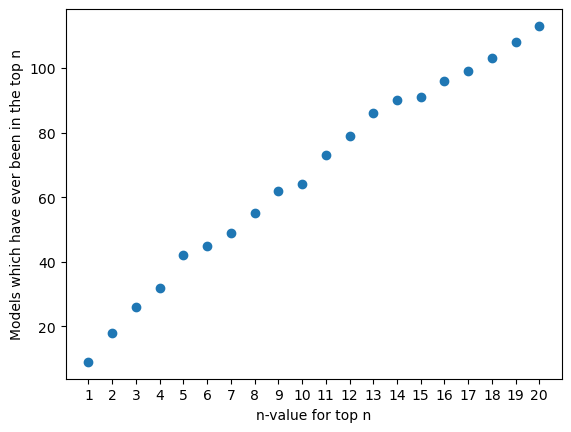

In [14]:
top_n = [np.sum(pcd_df_n[f'top_{n}_at_release']) for n in range(1, 21)]
plt.scatter(range(1, 21), top_n)
plt.xticks(ticks=range(1, 21))
plt.xlabel('n-value for top n')
plt.ylabel('Models which have ever been in the top n')
plt.show()

In [15]:
top_n_models = {}
for n in range(1, 21):
    models = pcd_df_n[pcd_df_n[f'top_{n}_at_release']]['System'].values.tolist()
    top_n_models[n] = set(models)

for n in range(20, 1, -1):
    top_n_models[n] = list(top_n_models[n].difference(top_n_models[n-1]))
top_n_models[1] = list(top_n_models[1])

In [16]:
for n in range(1, 21):
    top_n_models[n] = list(sorted(top_n_models[n]))

In [17]:
with open('data/frontier_systems_by_top_n.json', 'w') as f:
    json.dump(top_n_models, f, indent=4)

# Default large scale systems

https://colab.research.google.com/drive/1PLGY5ErysqQMfy7Z08uIR2cTnnDgSaVR?usp=sharing

In [18]:
high_outliers_z_value_threshold = 0.76

In [19]:
large_scale_idx = set()

for index, row in pcd_df.iterrows():
  # Filter entries in a 2-year window around the paper
  window_size = pd.Timedelta(f'{outlier_window_size*52*7} days')
  half_window_size = window_size / 2
  mask = ( row['Publication date'] - half_window_size <= pcd_df['Publication date'] ) &\
        ( pcd_df['Publication date'] <= row['Publication date'] + half_window_size )
  window_df = pcd_df[mask].copy()

  if len(window_df) < 2: continue

  window_df['Training compute (FLOP) z scores'] = stats.zscore(np.log10(window_df['Training compute (FLOP)'].values))
  if window_df.loc[index, 'Training compute (FLOP) z scores'] > high_outliers_z_value_threshold:
    large_scale_idx.add(index)

large_scale_mask = pcd_df.index.isin(large_scale_idx) & (pcd_df['Publication date'] > start_large_scale_era)

In [20]:
large_scale_df = pcd_df[large_scale_mask]

In [21]:
large_scale_df

,System,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,top_11_at_release,top_12_at_release,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release
1222,AlphaGo Lee,Games,Go,"David Silver, Aja Huang, Chris J. Maddison, Ar...",Highly cited,NaN,NaN,https://www.nature.com/articles/nature16961,14887.0,Mastering the game of Go with deep neural netw...,...,True,True,True,True,True,True,True,True,True,True
1180,GNMT,Language,Translation,"Yonghui Wu, Mike Schuster, Zhifeng Chen, Quoc ...",Highly cited,NaN,Hosted access (no API),https://arxiv.org/abs/1609.08144,6196.0,Google's Neural Machine Translation System: Br...,...,True,True,True,True,True,True,True,True,True,True
1179,Xception,Vision,Image classification,François Chollet,Highly cited,NaN,NaN,https://arxiv.org/abs/1610.02357,11578.0,Xception: Deep Learning with Depthwise Separab...,...,True,True,True,True,True,True,True,True,True,True
1171,NASv3 (CIFAR-10),Vision,NaN,"Barret Zoph, Quoc V. Le",Highly cited,NaN,NaN,https://arxiv.org/abs/1611.01578,4781.0,Neural Architecture Search with Reinforcement ...,...,True,True,True,True,True,True,True,True,True,True
1152,AlphaGo Master,Games,Go,"D Silver, J Schrittwieser, K Simonyan, I Anton...",Highly cited,NaN,NaN,https://www.nature.com/articles/nature24270,8103.0,Mastering the game of Go without human knowledge,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Qwen-72B,Language,"Chat,Code generation","Jinze Bai, Shuai Bai, Yunfei Chu, Zeyu Cui, Ka...",SOTA improvement,"SOTA on several Chinese benchmarks, with highe...",Open access (restricted use),https://huggingface.co/Qwen/Qwen-72B,NaN,NaN,...,False,True,True,True,True,True,True,True,True,True
88,Gemini 1.0 Ultra,"Multimodal,Language,Vision","Language modelling,Visual question answering,C...",Gemini Team,SOTA improvement,""" Evaluation on a broad range of benchmarks sh...",Hosted access (no API),https://storage.googleapis.com/deepmind-media/...,633.0,Gemini: A Family of Highly Capable Multimodal ...,...,True,True,True,True,True,True,True,True,True,True
42,MegaScale (Production),Language,Language modelling/generation,"Ziheng Jiang, Haibin Lin, Yinmin Zhong, Qi Hua...",SOTA improvement,Improves SOTA in FLOP utilization for distribu...,Unreleased,https://arxiv.org/abs/2402.15627,1.0,MegaScale: Scaling Large Language Model Traini...,...,True,True,True,True,True,True,True,True,True,True
27,Inflection-2.5,Language,Chat,NaN,Significant use,one million daily users; six million monthly,Hosted access (no API),https://inflection.ai/inflection-2-5,NaN,Inflection-2.5: meet the world's best personal AI,...,True,True,True,True,True,True,True,True,True,True


In [22]:
for system in large_scale_df['System'][::-1]:
  print(system)

Llama 3-70B
Inflection-2.5
MegaScale (Production)
Gemini 1.0 Ultra
Qwen-72B
Inflection-2
Grok-1
ChatGLM3
Falcon-180B
Llama 2-70B
Claude 2
xTrimoPGLM -100B
PaLM 2
PanGu-Σ
GPT-4
LLaMA-65B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
Flan-PaLM 540B
U-PaLM (540B)
BlenderBot 3
GLM-130B
AlexaTM 20B
Minerva (540B)
Parti
UL2
OPT-175B
Flamingo
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
GPT-NeoX-20B
AlphaCode
ERNIE 3.0 Titan
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
HyperCLOVA 82B
GOAT
ByT5-XXL
ProtT5-XXL
Meta Pseudo Labels
Switch
DALL-E
mT5-XXL
GShard (dense)
iGPT-XL
GPT-3 175B (davinci)
Turing-NLG
Meena
ContextNet + Noisy Student
OpenAI Five
OpenAI Five Rerun
AlphaStar
T5-11B
Megatron-BERT
Megatron-LM (8.3B)
RoBERTa Large
XLNet
MnasNet-A1 + SSDLite
MnasNet-A3
GPT-2 (1.5B)
BigGAN-deep 512x512
FTW
ResNeXt-101 32x48d
IMPALA
AmoebaNet-A (F=448)
AlphaZero
AlphaGo Zero
OpenAI TI7 DOTA 1v1
JFT
Libratus
AlphaGo Master
NASv3 (CIFAR-10)
Xception
GNMT
AlphaGo Lee


# Percentiles (SECOND CHOICE)

In [23]:
frontier_systems_by_percentile = {}
percentile_interval = 5
for percentile in range(95, -5, -percentile_interval):
  print(percentile)
  percentile_compute_low = np.zeros(len(pcd_df))
  percentile_compute_high = np.zeros(len(pcd_df))
  # Iterate through each row and calculate the 2-year moving average for each date
  for i, (index, row) in enumerate(pcd_df.iterrows()):
    # Define the 2-year window
    start_date = row['Publication date'] - pd.DateOffset(years=outlier_window_size/2)
    end_date = row['Publication date'] + pd.DateOffset(years=outlier_window_size/2)

    # Filter the DataFrame for this window
    window_df = pcd_df[(pcd_df['Publication date'] >= start_date) & (pcd_df['Publication date'] <= end_date)]

    percentile_compute_low[i] = np.percentile(window_df['Training compute (FLOP)'], percentile)
    percentile_compute_high[i] = np.percentile(window_df['Training compute (FLOP)'], percentile + percentile_interval)

  frontier_systems_flag = pcd_df['Training compute (FLOP)'] > np.array(percentile_compute_low)
  extra_frontier_systems_flag = pcd_df['Training compute (FLOP)'] <= np.array(percentile_compute_high)

  # raise Exception("Edit the following line if you want to consider models released after 2023-12-31.")
  extra_frontier_systems = pcd_df['System'][frontier_systems_flag & extra_frontier_systems_flag & (pcd_df['Publication date'] > pd.to_datetime('2015-09-30')) & (pcd_df['Publication date'] < pd.to_datetime('2024-01-01'))].values

  frontier_systems_by_percentile[percentile] = list(extra_frontier_systems)

95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0


In [24]:
frontier_systems_by_percentile

{95: ['GNMT',
  'AlphaGo Master',
  'AlphaGo Zero',
  'AlphaZero',
  'ResNeXt-101 32x48d',
  'FTW',
  'Megatron-BERT',
  'OpenAI Five',
  'Meena',
  'GPT-3 175B (davinci)',
  'Megatron-Turing NLG 530B',
  'PaLM (540B)',
  'Minerva (540B)',
  'GPT-4',
  'PaLM 2',
  'Inflection-2',
  'Gemini 1.0 Ultra'],
 90: ['NASv3 (CIFAR-10)',
  'T5-11B',
  'AlphaStar',
  'mT5-XXL',
  'Switch',
  'Gopher (280B)',
  'ERNIE 3.0 Titan',
  'Chinchilla',
  'U-PaLM (540B)',
  'Flan-PaLM 540B',
  'GPT-3.5 (text-davinci-003)',
  'Claude 2',
  'Falcon-180B'],
 85: ['AlphaGo Fan',
  'AlphaGo Lee',
  'JFT',
  'AmoebaNet-A (F=448)',
  'Megatron-LM (8.3B)',
  'OpenAI Five Rerun',
  'Turing-NLG',
  'Yuan 1.0',
  'GLaM',
  'LaMDA',
  'OPT-175B',
  'BLOOM-176B',
  'Grok-1'],
 80: ['OpenAI TI7 DOTA 1v1',
  'IMPALA',
  'BigGAN-deep 512x512',
  'GPT-2 (1.5B)',
  'XLNet',
  'ContextNet + Noisy Student',
  'iGPT-XL',
  'DALL-E',
  'Meta Pseudo Labels',
  'ProtT5-XXL',
  'ByT5-XXL',
  'GOAT',
  'HyperCLOVA 82B',
  'AlphaCo

In [25]:
for percentile in range(95, -5, -percentile_interval):
    frontier_systems_by_percentile[percentile] = list(sorted(frontier_systems_by_percentile[percentile]))

In [26]:
# Save to JSON
with open('data/frontier_systems_by_window_percentile.json', 'w') as f:
    json.dump(frontier_systems_by_percentile, f, indent=4)

In [27]:
total_num_systems = 0
for percentile, systems in frontier_systems_by_percentile.items():
  total_num_systems += len(systems)
  print(percentile, 'to', percentile + percentile_interval)
  print(len(systems), "systems")
  print(f'Total systems above {percentile}th percentile: {total_num_systems}')
  for system in systems[::-1]:
    print(system)
  print()

95 to 100
17 systems
Total systems above 95th percentile: 17
ResNeXt-101 32x48d
PaLM 2
PaLM (540B)
OpenAI Five
Minerva (540B)
Megatron-Turing NLG 530B
Megatron-BERT
Meena
Inflection-2
Gemini 1.0 Ultra
GPT-4
GPT-3 175B (davinci)
GNMT
FTW
AlphaZero
AlphaGo Zero
AlphaGo Master

90 to 95
13 systems
Total systems above 90th percentile: 30
mT5-XXL
U-PaLM (540B)
T5-11B
Switch
NASv3 (CIFAR-10)
Gopher (280B)
GPT-3.5 (text-davinci-003)
Flan-PaLM 540B
Falcon-180B
ERNIE 3.0 Titan
Claude 2
Chinchilla
AlphaStar

85 to 90
13 systems
Total systems above 85th percentile: 43
Yuan 1.0
Turing-NLG
OpenAI Five Rerun
OPT-175B
Megatron-LM (8.3B)
LaMDA
JFT
Grok-1
GLaM
BLOOM-176B
AmoebaNet-A (F=448)
AlphaGo Lee
AlphaGo Fan

80 to 85
23 systems
Total systems above 80th percentile: 66
iGPT-XL
XLNet
ST-MoE
Qwen-72B
ProtT5-XXL
Parti
OpenAI TI7 DOTA 1v1
Meta Pseudo Labels
Llama 2-70B
LLaMA-65B
IMPALA
HyperCLOVA 82B
GPT-2 (1.5B)
GOAT
GLM-130B
Flamingo
DALL-E
ContextNet + Noisy Student
ChatGLM3
ByT5-XXL
BlenderBot 3
B

# Distance from compute record at the time

In [28]:
ooms_from_frontier = 2

In [29]:
current_max = 0
running_max = np.zeros(len(pcd_df))
for i, compute in enumerate(pcd_df['Training compute (FLOP)']):
  if compute > current_max:
    running_max[i] = compute
    current_max = compute
  else:
    running_max[i] = current_max
running_max

array([4.00000000e+01, 6.94894940e+05, 6.00000000e+08, 6.00000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 7.20000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 7.20000000e+08,
       7.20000000e+08, 7.20000000e+08, 2.76640650e+10, 2.83280026e+10,
       2.83280026e+10, 2.83280026e+10, 2.83280026e+10, 1.81440000e+11,
       1.81440000e+11, 1.81440000e+11, 1.81440000e+11, 1.82321576e+13,
       1.82321576e+13, 1.82321576e+13, 1.82321576e+13, 1.82321576e+13,
       2.10080000e+13, 2.10080000e+13, 6.30000000e+13, 1.30389876e+15,
       1.30389876e+15, 1.30389876e+15, 1.30389876e+15, 1.30389876e+15,
       3.41463600e+15, 6.14400000e+16, 6.14400000e+16, 6.14400000e+16,
       2.73196800e+17, 2.73196800e+17, 6.00000000e+17, 6.00000000e+17,
       6.00000000e+17, 6.00000000e+17, 6.00000000e+17, 6.00000000e+17,
       6.00000000e+17, 6.00000000e+17, 1.34092800e+18, 1.34092800e+18,
       1.34092800e+18, 1.34092800e+18, 1.34092800e+18, 3.41107200e+18,
      

In [30]:
pcd_df['Frontier training compute (FLOP)'] = running_max

In [31]:
pcd_df['Frontier system'] = (pcd_df['Publication date'] > start_large_scale_era) & (np.log10(pcd_df['Frontier training compute (FLOP)']) - np.log10(pcd_df['Training compute (FLOP)']) <= ooms_from_frontier)
pcd_df[['System', 'Frontier system']]

,System,Frontier system
1525,Theseus,False
1519,Perceptron Mark I,False
1518,Pandemonium (morse),False
1517,Samuel Neural Checkers,False
1515,Perceptron (1960),False
...,...,...
40,MegaScale (175B),False
27,Inflection-2.5,True
26,MM1-30B,False
9,Llama 3-70B,True


In [32]:
frontier_df = pcd_df[pcd_df['Frontier system']]
frontier_df

,System,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release,Frontier training compute (FLOP),Frontier system
1228,DeepSpeech2 (English),Speech,Speech recognition,"Dario Amodei, Rishita Anubhai, Eric Battenberg...",Highly cited,NaN,NaN,https://arxiv.org/abs/1512.02595,2749.0,Deep Speech 2: End-to-End Speech Recognition i...,...,True,True,True,True,True,True,True,True,3.800000e+20,True
1226,ResNet-152 (ImageNet),Vision,Image classification,"Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun",Highly cited,NaN,NaN,https://arxiv.org/abs/1512.03385,156882.0,Deep Residual Learning for Image Recognition,...,True,True,True,True,True,True,True,True,3.800000e+20,True
1222,AlphaGo Lee,Games,Go,"David Silver, Aja Huang, Chris J. Maddison, Ar...",Highly cited,NaN,NaN,https://www.nature.com/articles/nature16961,14887.0,Mastering the game of Go with deep neural netw...,...,True,True,True,True,True,True,True,True,1.900000e+21,True
1180,GNMT,Language,Translation,"Yonghui Wu, Mike Schuster, Zhifeng Chen, Quoc ...",Highly cited,NaN,Hosted access (no API),https://arxiv.org/abs/1609.08144,6196.0,Google's Neural Machine Translation System: Br...,...,True,True,True,True,True,True,True,True,6.620000e+21,True
1179,Xception,Vision,Image classification,François Chollet,Highly cited,NaN,NaN,https://arxiv.org/abs/1610.02357,11578.0,Xception: Deep Learning with Depthwise Separab...,...,True,True,True,True,True,True,True,True,6.620000e+21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,MegaScale (Production),Language,Language modelling/generation,"Ziheng Jiang, Haibin Lin, Yinmin Zhong, Qi Hua...",SOTA improvement,Improves SOTA in FLOP utilization for distribu...,Unreleased,https://arxiv.org/abs/2402.15627,1.0,MegaScale: Scaling Large Language Model Traini...,...,True,True,True,True,True,True,True,True,5.000000e+25,True
41,MegaScale (530B),Language,Language modelling/generation,"Ziheng Jiang, Haibin Lin, Yinmin Zhong, Qi Hua...",SOTA improvement,Improves SOTA in FLOP utilization for distribu...,Unreleased,https://arxiv.org/abs/2402.15627,1.0,MegaScale: Scaling Large Language Model Traini...,...,False,False,False,False,False,True,True,True,5.000000e+25,True
27,Inflection-2.5,Language,Chat,NaN,Significant use,one million daily users; six million monthly,Hosted access (no API),https://inflection.ai/inflection-2-5,NaN,Inflection-2.5: meet the world's best personal AI,...,True,True,True,True,True,True,True,True,5.000000e+25,True
9,Llama 3-70B,Language,"Chat,Language modelling/generation,Code genera...",Aaditya Singh; Aaron Grattafiori; Abhimanyu Du...,Significant use,Will almost certainly be very influential and ...,Open access (restricted use),https://ai.meta.com/blog/meta-llama-3/\n\nhttp...,NaN,Introducing Meta Llama 3: The most capable ope...,...,True,True,True,True,True,True,True,True,5.000000e+25,True


In [33]:
for system in frontier_df['System'][::-1]:
  print(system)

Llama 3-8B
Llama 3-70B
Inflection-2.5
MegaScale (530B)
MegaScale (Production)
Gemini 1.0 Ultra
Qwen-72B
Inflection-2
Grok-1
Yi-34B
Skywork-13B
ChatGLM3
Falcon-180B
Llama 2-70B
Llama 2-34B
Claude 2
xTrimoPGLM -100B
PaLM 2
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-13B
LLaMA-65B
LLaMA-7B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
Taiyi-Stable Diffusion
Flan-T5 11B
Flan-PaLM 540B
U-PaLM (540B)
Whisper
PaLI
BlenderBot 3
GLM-130B
AlexaTM 20B
ESM2-3B
ESM2-15B
Minerva (540B)
Parti
CoCa
UL2
OPT-175B
Flamingo
Stable Diffusion (LDM-KL-8-G)
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
GPT-NeoX-20B
RETRO-7B
AlphaCode
ERNIE 3.0 Titan
XGLM-7.5B
XGLM
GLaM
Gopher (280B)
Student of Games
Florence
BASIC-L
Yuan 1.0
Megatron-Turing NLG 530B
AlphaFold-Multimer
HyperCLOVA 82B
FLAN 137B
SEER
HuBERT
GOAT
ERNIE 3.0
ALIGN
DeBERTa
CoAtNet
ByT5-XXL
CogView
ADM
ProtT5-XXL
ProtT5-XXL-BFD
ProtBERT-BFD
PLUG
M6-T
Meta Pseudo Labels
MSA Transformer
Switch
CLIP (ViT L/14@336px)
DALL-E
ViT-Huge/14
mT5-XXL
Conformer 

# Constant threshold

In [34]:
compute_threshold = 1e23

In [35]:
above_threshold = pcd_df[pcd_df['Training compute (FLOP)'] > compute_threshold]

In [36]:
print(len(above_threshold), 'systems')
for system in above_threshold['System'][::-1]:
  print(system)

59 systems
Llama 3-8B
Llama 3-70B
MM1-30B
Inflection-2.5
MegaScale (175B)
MegaScale (530B)
MegaScale (Production)
FunSearch
Gemini 1.0 Ultra
Qwen-72B
Inflection-2
Nemotron-3-8B
Grok-1
Yi-34B
Skywork-13B
ChatGLM3
FinGPT-13B
Falcon-180B
Llama 2-70B
Llama 2-34B
Llama 2-13B
Claude 2
xTrimoPGLM -100B
WizardCoder-15.5B
PaLM 2
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-65B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
Flan-PaLM 540B
U-PaLM (540B)
BlenderBot 3
GLM-130B
AlexaTM 20B
Minerva (540B)
Parti
UL2
OPT-175B
Flamingo
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
AlphaCode
ERNIE 3.0 Titan
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
HyperCLOVA 82B
GPT-3 175B (davinci)
Meena
AlphaGo Zero
AlphaGo Master
